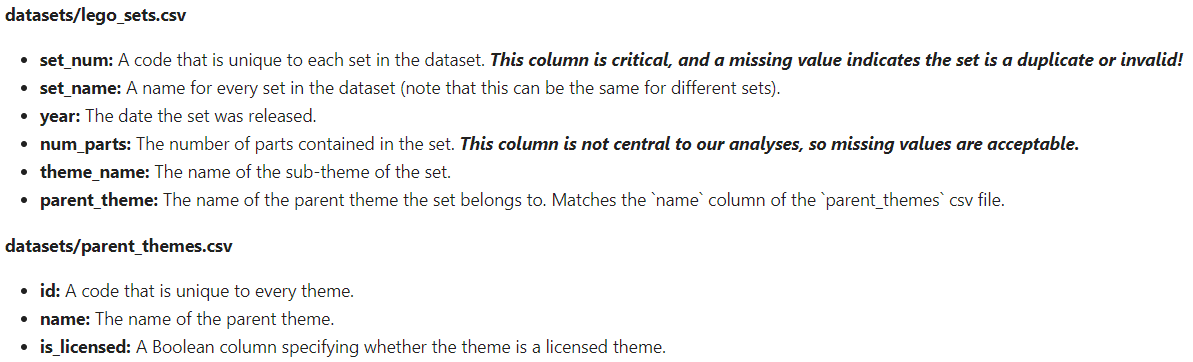

#### Librairies

In [1]:
%matplotlib inline
import pandas as pd
import warnings
import matplotlib.pyplot as plt

### ignore warnings

In [2]:
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

### show all dataframe rows and columns

In [3]:
pd.set_option('display.max_rows', None)
pd. set_option('display.max_columns', None)

### Read data

In [4]:
lego_sets = pd.read_csv("datasets/lego_sets.csv")
parent_themes = pd.read_csv("datasets/parent_themes.csv")

In [5]:
lego_sets.head(10)

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
5,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space
6,0015-1,Space Mini-Figures,1979,NaN,Supplemental,Space
7,0016-1,Castle Mini Figures,1978,NaN,Castle,Castle
8,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland
9,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland


In [6]:
parent_themes[parent_themes['name']=='Star Wars'].head()

,id,name,is_licensed
7,158,Star Wars,True


#### joining lego_sets.csv and parent_themes.csv

In [7]:
merged_df = lego_sets.merge(parent_themes,left_on='parent_theme',right_on='name')
merged_df.drop(columns='name_y',inplace=True)
merged_df.rename(columns={'name_x': 'name'},inplace=True)
merged_df.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


### drop the missing value of set_num

In [8]:
merged_df.dropna(subset = ['set_num'],inplace=True)
merged_df.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


### Question 1 : What percentage of all licensed sets ever released were Star Wars Themed?

In [9]:
merged_df[merged_df['is_licensed']].head() 

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [10]:
licensed_df=merged_df[merged_df['is_licensed']]
Star_wars_df = licensed_df[licensed_df['parent_theme']=='Star Wars']
Star_wars_df.shape

(609, 8)

In [11]:
percentage = int((Star_wars_df.shape[0] / merged_df[merged_df['is_licensed']].shape[0])*100)
percentage

51

### Question 2 : In which year was Star Wars not the most popular licensed theme?

In [12]:
sorted_df = licensed_df.sort_values('year')
df = sorted_df.groupby(['year','parent_theme']).sum().reset_index()
df = df.sort_values('is_licensed',ascending=False).drop_duplicates(['year'])
df.sort_values('year')

,year,parent_theme,num_parts,id,is_licensed
0,1999,Star Wars,1384.0,2054,13
2,2000,Star Wars,2580.0,4108,26
4,2001,Star Wars,2949.0,2212,14
6,2002,Star Wars,4735.0,4424,28
9,2003,Star Wars,6660.0,5056,32
12,2004,Star Wars,1659.0,3160,20
16,2005,Star Wars,4730.0,4424,28
20,2006,Star Wars,2769.0,1738,11
24,2007,Star Wars,11361.0,2528,16
28,2008,Star Wars,6865.0,3634,23


### Question 3 : How many sets were released each year (1955-2017)?

In [13]:
merged_df['count'] = 1
df = merged_df.groupby('year').sum().reset_index()[['year','count']]
df.head()

,year,count
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12


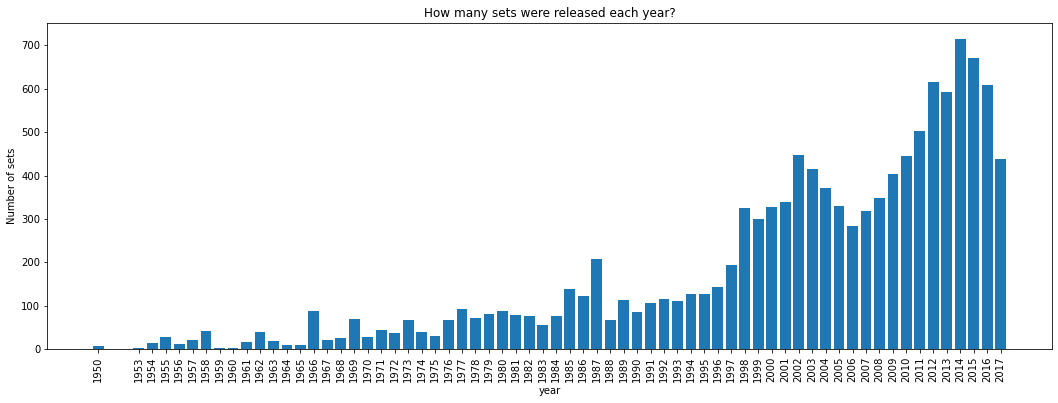

In [14]:
plt.figure(figsize=(18, 6))
plt.bar(df['year'],df['count'])
plt.title('How many sets were released each year?')
plt.xticks(df['year'],rotation='vertical')
plt.ylabel('Number of sets')
plt.xlabel('year')
plt.show()